<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/3_3_GRU_(Gated_Recurrent_Unit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.3. GRU (Gated Recurrent Unit)

GRU (сокращение от Gated Recurrent Unit) — это тип рекуррентной нейронной сети (RNN), которая решает проблему затухания градиента, улучшая обучение с помощью вентилей (gates). Основные элементы GRU — это **вентиль сброса (reset gate)** и **вентиль обновления (update gate)**, которые управляют потоком информации через сеть.

### Прямой проход (Forward Pass)

На каждом временном шаге GRU принимает входной вектор $x_t$ и предыдущее скрытое состояние $h_{t-1}$. Процесс обновления скрытого состояния проходит через несколько шагов, управляемых вентилями.

#### 1) Вентиль обновления (Update Gate)
Вентиль обновления определяет, насколько новое скрытое состояние $h_t$ будет зависеть от предыдущего состояния $h_{t-1}$. Он вычисляется как:

$$
z_t = \sigma(W_z \cdot x_t + U_z \cdot h_{t-1})
$$

где:
- $z_t$ — выход вентиля обновления,
- $\sigma$ — сигмоида (логистическая функция активации),
- $W_z$ — весовая матрица для входа $x_t$,
- $U_z$ — весовая матрица для предыдущего скрытого состояния $h_{t-1}$.

#### 2) Вентиль сброса (Reset Gate)
Этот вентиль управляет количеством информации из предыдущего состояния $h_{t-1}$, которое нужно "сбросить" перед обновлением скрытого состояния. Он рассчитывается по формуле:

$$
r_t = \sigma(W_r \cdot x_t + U_r \cdot h_{t-1})
$$

где:
- $r_t$ — выход вентиля сброса,
- $W_r$ — весовая матрица для входного вектора $x_t$,
- $U_r$ — весовая матрица для скрытого состояния $h_{t-1}$.

#### 3) Кандидатное скрытое состояние (Candidate Hidden State)
На основе выходов вентилей сброса и обновления вычисляется новое **кандидатное скрытое состояние** $\tilde{h}_t$. В этом процессе вентиль сброса $r_t$ контролирует, сколько информации из предыдущего скрытого состояния включить в расчет:

$$
\tilde{h}_t = \tanh(W_h \cdot x_t + r_t \cdot (U_h \cdot h_{t-1}))
$$

Здесь $\tanh$ — это гиперболический тангенс, который сжимает значения между -1 и 1.

#### 4) Итоговое скрытое состояние (Final Hidden State)
Новое скрытое состояние $h_t$ является линейной комбинацией предыдущего состояния $h_{t-1}$ и кандидатного состояния $\tilde{h}_t$, где степень влияния каждого компонента контролируется вентилем обновления $z_t$:

$$
h_t = z_t \cdot h_{t-1} + (1 - z_t) \cdot \tilde{h}_t
$$

Таким образом, $z_t$ управляет тем, насколько сильно будет использовано предыдущее состояние по сравнению с новым кандидатом $\tilde{h}_t$.

### Общий вид рекуррентной связи в GRU

Для каждого временного шага $t$ состояния сети обновляются следующим образом:

1. **Вентиль обновления**:
$$
   z_t = \sigma(W_z \cdot x_t + U_z \cdot h_{t-1})
$$
2. **Вентиль сброса**:
$$
   r_t = \sigma(W_r \cdot x_t + U_r \cdot h_{t-1})
$$
3. **Кандидатное состояние**:
$$
   \tilde{h}_t = \tanh(W_h \cdot x_t + r_t \cdot (U_h \cdot h_{t-1}))
$$
4. **Итоговое скрытое состояние**:
$$
   h_t = z_t \cdot h_{t-1} + (1 - z_t) \cdot \tilde{h}_t
$$

### Весовые матрицы и функции активации

- **Весовые матрицы**:
  - $W_z, W_r, W_h$ — веса для входных данных $x_t$,
  - $U_z, U_r, U_h$ — веса для предыдущих скрытых состояний $h_{t-1}$.
- **Функции активации**:
  - $\sigma$ — сигмоида для вентилей,
  - $\tanh$ — гиперболический тангенс для вычисления кандидатного состояния.

### Обучение и минимизация функции потерь

Как и в других RNN, обучение GRU происходит с минимизацией функции потерь $L$ (например, кросс-энтропии в задачах классификации) через градиентный спуск. Например, веса $W_z$ обновляются следующим образом:

$$
W_z = W_z - \eta \frac{\partial L}{\partial W_z}
$$

где:
- $\eta$ — скорость обучения,
- $\frac{\partial L}{\partial W_z}$ — градиент функции потерь по весам $W_z$.

Аналогичные обновления применяются для весов $W_r, W_h$, а также рекуррентных весов $U_z, U_r, U_h$.

### Backpropagation Through Time (BPTT)

Обучение GRU через **Backpropagation Through Time (BPTT)** предполагает расчет градиентов на каждом временном шаге с учетом зависимостей между состояниями на разных шагах.

#### 1) Градиент для вентилей обновления $W_z$ и сброса $W_r$
Градиенты для вентилей $W_z$ и $W_r$ зависят от влияния этих вентилей на результат сети на каждом временном шаге:

$$
\frac{\partial L}{\partial W_z} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial z_t} \cdot \frac{\partial z_t}{\partial W_z}
$$

#### 2) Градиент для $W_h$ и $U_h$
Градиенты по весам, связанным с кандидатным состоянием $\tilde{h}_t$, вычисляются следующим образом:

$$
\frac{\partial L}{\partial W_h} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial \tilde{h}_t} \cdot \frac{\partial \tilde{h}_t}{\partial W_h}
$$

#### 3) Градиенты для рекуррентных весов $U_z, U_r, U_h$
Рекуррентные веса обновляются с учетом связей между временными шагами:

$$
\frac{\partial L}{\partial U_h} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial \tilde{h}_t} \cdot \frac{\partial \tilde{h}_t}{\partial U_h}
$$

### Преимущества GRU перед классическими RNN

1. **Меньший риск затухания градиента**: Вентиля управления улучшают способность сети справляться с долгосрочными зависимостями.
2. **Меньше параметров, чем у LSTM**: GRU использует два вентиля вместо трех, что уменьшает количество параметров и снижает вычислительную нагрузку.
3. **Гибкость**: GRU адаптируется к последовательностям любой длины, автоматически регулируя, сколько информации нужно забыть или сохранить.



Для того чтобы провести числовой пример работы GRU, мы рассмотрим упрощенный случай. Пусть в нашем примере будут следующие параметры и входные данные:

### Параметры:
- Входной вектор на шаге $t$: $x_t = [0.5, 0.3]$
- Предыдущее скрытое состояние: $h_{t-1} = [0.4, 0.1]$
- Весовые матрицы для входов и предыдущих состояний:
  - $W_z = \begin{bmatrix} 0.2 & 0.1 \\ 0.4 & 0.3 \end{bmatrix}$
  - $U_z = \begin{bmatrix} 0.5 & 0.2 \\ 0.1 & 0.7 \end{bmatrix}$
  - $W_r = \begin{bmatrix} 0.3 & 0.6 \\ 0.7 & 0.5 \end{bmatrix}$
  - $U_r = \begin{bmatrix} 0.4 & 0.3 \\ 0.6 & 0.2 \end{bmatrix}$
  - $W_h = \begin{bmatrix} 0.1 & 0.5 \\ 0.2 & 0.4 \end{bmatrix}$
  - $U_h = \begin{bmatrix} 0.6 & 0.3 \\ 0.2 & 0.5 \end{bmatrix}$

### Шаги:

#### 1. Вентиль обновления $z_t$
Вычисляем значение вентиля обновления $z_t$, используя формулу:

$$
z_t = \sigma(W_z \cdot x_t + U_z \cdot h_{t-1})
$$

##### Шаг 1.1: Умножение матриц для $W_z \cdot x_t$
$$
W_z \cdot x_t = \begin{bmatrix} 0.2 & 0.1 \\ 0.4 & 0.3 \end{bmatrix} \cdot \begin{bmatrix} 0.5 \\ 0.3 \end{bmatrix} = \begin{bmatrix} 0.2 \cdot 0.5 + 0.1 \cdot 0.3 \\ 0.4 \cdot 0.5 + 0.3 \cdot 0.3 \end{bmatrix} = \begin{bmatrix} 0.13 \\ 0.29 \end{bmatrix}
$$

##### Шаг 1.2: Умножение матриц для $U_z \cdot h_{t-1}$
$$
U_z \cdot h_{t-1} = \begin{bmatrix} 0.5 & 0.2 \\ 0.1 & 0.7 \end{bmatrix} \cdot \begin{bmatrix} 0.4 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 0.5 \cdot 0.4 + 0.2 \cdot 0.1 \\ 0.1 \cdot 0.4 + 0.7 \cdot 0.1 \end{bmatrix} = \begin{bmatrix} 0.22 \\ 0.11 \end{bmatrix}
$$

##### Шаг 1.3: Сложение и применение сигмоиды
$$
z_t = \sigma(\begin{bmatrix} 0.13 \\ 0.29 \end{bmatrix} + \begin{bmatrix} 0.22 \\ 0.11 \end{bmatrix}) = \sigma(\begin{bmatrix} 0.35 \\ 0.4 \end{bmatrix})
$$
Применим сигмоиду:

$$
z_t = \frac{1}{1 + e^{-0.35}} = 0.5866, \quad z_t = \frac{1}{1 + e^{-0.4}} = 0.5987
$$
Итак, $z_t = \begin{bmatrix} 0.5866 \\ 0.5987 \end{bmatrix}$.

#### 2. Вентиль сброса $r_t$
Вычисляем значение вентиля сброса $r_t$, используя формулу:

$$
r_t = \sigma(W_r \cdot x_t + U_r \cdot h_{t-1})
$$

##### Шаг 2.1: Умножение матриц для $W_r \cdot x_t$
$$
W_r \cdot x_t = \begin{bmatrix} 0.3 & 0.6 \\ 0.7 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0.5 \\ 0.3 \end{bmatrix} = \begin{bmatrix} 0.3 \cdot 0.5 + 0.6 \cdot 0.3 \\ 0.7 \cdot 0.5 + 0.5 \cdot 0.3 \end{bmatrix} = \begin{bmatrix} 0.39 \\ 0.5 \end{bmatrix}
$$

##### Шаг 2.2: Умножение матриц для $U_r \cdot h_{t-1}$
$$
U_r \cdot h_{t-1} = \begin{bmatrix} 0.4 & 0.3 \\ 0.6 & 0.2 \end{bmatrix} \cdot \begin{bmatrix} 0.4 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 0.4 \cdot 0.4 + 0.3 \cdot 0.1 \\ 0.6 \cdot 0.4 + 0.2 \cdot 0.1 \end{bmatrix} = \begin{bmatrix} 0.19 \\ 0.26 \end{bmatrix}
$$

##### Шаг 2.3: Сложение и применение сигмоиды
$$
r_t = \sigma(\begin{bmatrix} 0.39 \\ 0.5 \end{bmatrix} + \begin{bmatrix} 0.19 \\ 0.26 \end{bmatrix}) = \sigma(\begin{bmatrix} 0.58 \\ 0.76 \end{bmatrix})
$$
Применим сигмоиду:

$$
r_t = \frac{1}{1 + e^{-0.58}} = 0.6411, \quad r_t = \frac{1}{1 + e^{-0.76}} = 0.6814
$$
Итак, $r_t = \begin{bmatrix} 0.6411 \\ 0.6814 \end{bmatrix}$.

#### 3. Кандидатное состояние $\tilde{h}_t$
Теперь вычислим новое кандидатное состояние $\tilde{h}_t$ по формуле:

$$
\tilde{h}_t = \tanh(W_h \cdot x_t + r_t \cdot (U_h \cdot h_{t-1}))
$$

##### Шаг 3.1: Умножение матриц для $W_h \cdot x_t$
$$
W_h \cdot x_t = \begin{bmatrix} 0.1 & 0.5 \\ 0.2 & 0.4 \end{bmatrix} \cdot \begin{bmatrix} 0.5 \\ 0.3 \end{bmatrix} = \begin{bmatrix} 0.1 \cdot 0.5 + 0.5 \cdot 0.3 \\ 0.2 \cdot 0.5 + 0.4 \cdot 0.3 \end{bmatrix} = \begin{bmatrix} 0.2 \\ 0.32 \end{bmatrix}
$$

##### Шаг 3.2: Умножение матриц для $U_h \cdot h_{t-1}$
$$
U_h \cdot h_{t-1} = \begin{bmatrix} 0.6 & 0.3 \\ 0.2 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0.4 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 0.6 \cdot 0.4 + 0.3 \cdot 0.1 \\ 0.2 \cdot 0.4 + 0.5 \cdot 0.1 \end{bmatrix} = \begin{bmatrix} 0.27 \\ 0.13 \end{bmatrix}
$$

##### Шаг 3.3: Применение вентиля сброса $r_t$

$$
r_t \cdot (U_h \cdot h_{t-1}) = \begin{bmatrix} 0.6411 \\ 0.6814 \end{bmatrix} \cdot \begin{bmatrix} 0.27 \\ 0.13 \end{bmatrix} = \begin{bmatrix} 0.6411 \cdot 0.27 \\ 0.6814 \cdot 0.13 \end{bmatrix} = \begin{bmatrix} 0.1731 \\ 0.0886 \end{bmatrix}
$$

##### Шаг 3.4: Сложение и применение тангенса
$$
\tilde{h}_t = \tanh(\begin{bmatrix} 0.2 \\ 0.32 \end{bmatrix} + \begin{bmatrix} 0.1731 \\ 0.0886 \end{bmatrix}) = \tanh(\begin{bmatrix} 0.3731 \\ 0.4086 \end{bmatrix})
$$
Применим тангенс:

$$
\tilde{h}_t = \tanh(0.3731) = 0.3566, \quad \tilde{h}_t = \tanh(0.4086) = 0.3871
$$
Итак, $\tilde{h}_t = \begin{bmatrix} 0.3566 \\ 0.3871 \end{bmatrix}$.

#### 4. Итоговое скрытое состояние $h_t$
Теперь обновим скрытое состояние $h_t$, используя формулу:

$$
h_t = z_t \cdot h_{t-1} + (1 - z_t) \cdot \tilde{h}_t
$$

##### Шаг 4.1: Вычисление $z_t \cdot h_{t-1}$
$$
z_t \cdot h_{t-1} = \begin{bmatrix} 0.5866 \\ 0.5987 \end{bmatrix} \cdot \begin{bmatrix} 0.4 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 0.5866 \cdot 0.4 \\ 0.5987 \cdot 0.1 \end{bmatrix} = \begin{bmatrix} 0.2346 \\ 0.0599 \end{bmatrix}
$$

##### Шаг 4.2: Вычисление $(1 - z_t) \cdot \tilde{h}_t$
$$
(1 - z_t) \cdot \tilde{h}_t = \begin{bmatrix} 1 - 0.5866 \\ 1 - 0.5987 \end{bmatrix} \cdot \begin{bmatrix} 0.3566 \\ 0.3871 \end{bmatrix} = \begin{bmatrix} 0.4134 \\ 0.4013 \end{bmatrix} \cdot \begin{bmatrix} 0.3566 \\ 0.3871 \end{bmatrix} = \begin{bmatrix} 0.1474 \\ 0.1554 \end{bmatrix}
$$

##### Шаг 4.3: Сложение
$$
h_t = \begin{bmatrix} 0.2346 \\ 0.0599 \end{bmatrix} + \begin{bmatrix} 0.1474 \\ 0.1554 \end{bmatrix} = \begin{bmatrix} 0.3820 \\ 0.2153 \end{bmatrix}
$$

Итак, новое скрытое состояние $h_t = \begin{bmatrix} 0.3820 \\ 0.2153 \end{bmatrix}$.

### Результат
На шаге $t$ новое скрытое состояние $h_t = \begin{bmatrix} 0.3820 \\ 0.2153 \end{bmatrix}$, которое будет использоваться на следующем временном шаге, вместе с соответствующими входами для дальнейших вычислений.

Этот пример демонстрирует, как на каждом временном шаге обновляются скрытые состояния GRU, с учетом входных данных и предыдущего состояния.

Давайте реализуем пример работы Gated Recurrent Unit (GRU) на Python с использованием библиотеки NumPy для вычислений и Matplotlib для визуализации. Мы создадим шаги GRU, как было описано ранее, и затем визуализируем входные данные, веса и выходные состояния.

Реализация примера GRU на Python


Вентиль обновления z_t: [0.54176993 0.58893378]
Вентиль сброса r_t: [0.71929605 0.75444366]
Кандидатное состояние h_tilde: [0.3458786  0.64289174]
Итоговое скрытое состояние h_t: [0.37519995 0.32316445]


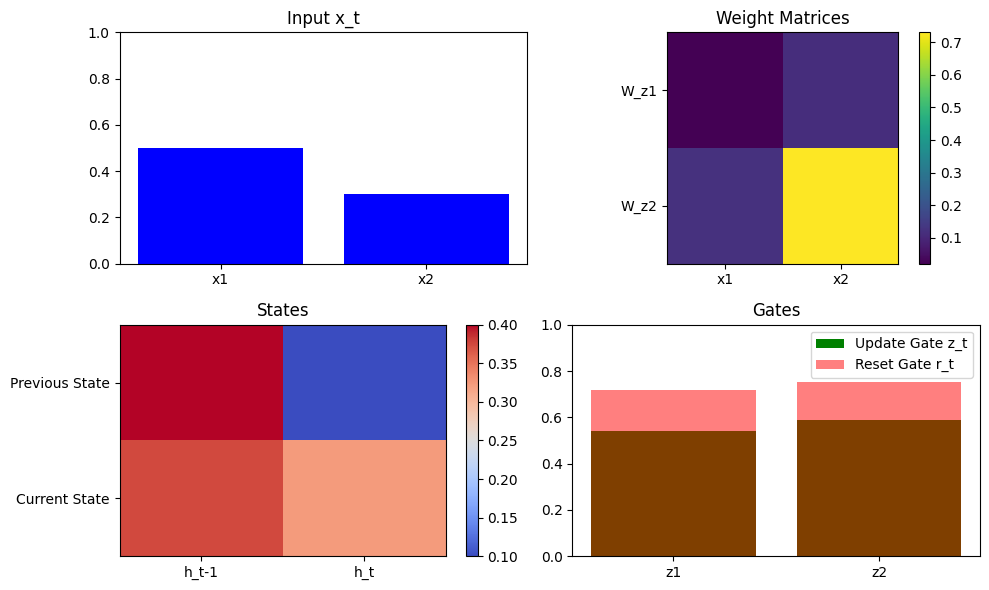

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class GRU:
    def __init__(self, input_size, hidden_size):
        # Инициализация весовых матриц
        self.W_z = np.random.rand(hidden_size, input_size)  # Входные веса для вентиля обновления
        self.U_z = np.random.rand(hidden_size, hidden_size)  # Рекуррентные веса для вентиля обновления
        self.W_r = np.random.rand(hidden_size, input_size)  # Входные веса для вентиля сброса
        self.U_r = np.random.rand(hidden_size, hidden_size)  # Рекуррентные веса для вентиля сброса
        self.W_h = np.random.rand(hidden_size, input_size)  # Входные веса для кандидатного состояния
        self.U_h = np.random.rand(hidden_size, hidden_size)  # Рекуррентные веса для кандидатного состояния

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x_t, h_t_minus_1):
        # 1. Вентиль обновления z_t
        z_t = self.sigmoid(np.dot(self.W_z, x_t) + np.dot(self.U_z, h_t_minus_1))

        # 2. Вентиль сброса r_t
        r_t = self.sigmoid(np.dot(self.W_r, x_t) + np.dot(self.U_r, h_t_minus_1))

        # 3. Кандидатное состояние h_tilde
        h_tilde = self.tanh(np.dot(self.W_h, x_t) + r_t * (np.dot(self.U_h, h_t_minus_1)))

        # 4. Итоговое скрытое состояние h_t
        h_t = z_t * h_t_minus_1 + (1 - z_t) * h_tilde

        return h_t, z_t, r_t, h_tilde

# Задаем параметры
input_size = 2  # Размер входного вектора
hidden_size = 2  # Размер скрытого состояния

# Инициализация GRU
gru = GRU(input_size, hidden_size)

# Пример входных данных
x_t = np.array([0.5, 0.3])  # Входной вектор
h_t_minus_1 = np.array([0.4, 0.1])  # Предыдущее скрытое состояние

# Выполнение прямого прохода
h_t, z_t, r_t, h_tilde = gru.forward(x_t, h_t_minus_1)

# Вывод результатов
print("Вентиль обновления z_t:", z_t)
print("Вентиль сброса r_t:", r_t)
print("Кандидатное состояние h_tilde:", h_tilde)
print("Итоговое скрытое состояние h_t:", h_t)

# Визуализация
plt.figure(figsize=(10, 6))

# Входные данные
plt.subplot(2, 2, 1)
plt.title('Input x_t')
plt.bar(range(len(x_t)), x_t, color='blue')
plt.xticks(range(len(x_t)), ['x1', 'x2'])
plt.ylim(0, 1)

# Весовые матрицы
plt.subplot(2, 2, 2)
plt.title('Weight Matrices')
plt.imshow(gru.W_z, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(gru.W_z.shape[1]), ['x1', 'x2'])
plt.yticks(range(gru.W_z.shape[0]), ['W_z1', 'W_z2'])

# Состояния
plt.subplot(2, 2, 3)
plt.title('States')
states = np.array([h_t_minus_1, h_t])
plt.imshow(states, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(states.shape[1]), ['h_t-1', 'h_t'])
plt.yticks(range(states.shape[0]), ['Previous State', 'Current State'])

# Вентиль обновления и сброса
plt.subplot(2, 2, 4)
plt.title('Gates')
plt.bar(range(len(z_t)), z_t, color='green', label='Update Gate z_t')
plt.bar(range(len(r_t)), r_t, color='red', alpha=0.5, label='Reset Gate r_t')
plt.xticks(range(len(z_t)), ['z1', 'z2'])
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

## Вопросы для самопроверки

1. Что такое GRU и в чем его основное преимущество по сравнению с классическими RNN?
2. Опишите функции, выполняемые вентилями обновления и сброса в GRU.
3. Каково значение выходного вектора $z_t$?
4. Что такое кандидатное состояние $\tilde{h}_t$ и как оно вычисляется?
5. Как происходит обновление скрытого состояния $h_t$ в GRU?
6. В чем разница между GRU и LSTM?
7. Как функции активации (сигмоида и гиперболический тангенс) помогают в обучении GRU?
8. Какие шаги включает в себя процесс прямого прохода (forward pass) в GRU?
9. Как GRU решает проблему затухания градиента?
10. Опишите процесс обратного распространения ошибки (BPTT) в GRU.
11. Что такое весовые матрицы и как они используются в GRU?
12. Как можно визуализировать влияние вентилей на скрытое состояние?
13. Какая роль скорости обучения $\eta$ в процессе оптимизации весов?
14. Что происходит с состоянием сети, если $z_t = 1$ или $z_t = 0$?
15. Какой тип задач лучше всего решает GRU (например, классификация, регрессия и т.д.)?

## Задачи для самостоятельной работы

### Задачи на понимание GRU

1. Напишите формулы для вычисления вентилей $z_t$ и $r_t$ в GRU.
2. Опишите, как происходит обновление весов в GRU на основе градиентного спуска.
3. Сравните количество параметров в GRU и LSTM.
4. Объясните, как GRU обрабатывает последовательные данные различной длины.
5. Создайте простую визуализацию, показывающую, как изменяется скрытое состояние при различных значениях входного вектора.

### Математические задачи

6. Даны веса для вентиля обновления: $W_z = \begin{pmatrix} 0.2 & 0.4 \\ 0.5 & 0.1 \end{pmatrix}$, $U_z = \begin{pmatrix} 0.3 & 0.6 \\ 0.1 & 0.7 \end{pmatrix}$. Вычислите $z_t$ для $x_t = \begin{pmatrix} 0.5 \\ 0.3 \end{pmatrix}$ и $h_{t-1} = \begin{pmatrix} 0.4 \\ 0.2 \end{pmatrix}$.

7. Вычислите выход вентиля сброса $r_t$ для весов: $W_r = \begin{pmatrix} 0.1 & 0.3 \\ 0.2 & 0.5 \end{pmatrix}$, $U_r = \begin{pmatrix} 0.4 & 0.7 \\ 0.2 & 0.1 \end{pmatrix}$ и входных данных $x_t = \begin{pmatrix} 0.6 \\ 0.1 \end{pmatrix}$ и $h_{t-1} = \begin{pmatrix} 0.3 \\ 0.4 \end{pmatrix}$.

8. Рассчитайте кандидатное состояние $\tilde{h}_t$ с весами $W_h = \begin{pmatrix} 0.5 & 0.2 \\ 0.1 & 0.4 \end{pmatrix}$, $U_h = \begin{pmatrix} 0.3 & 0.5 \\ 0.6 & 0.2 \end{pmatrix}$, $x_t = \begin{pmatrix} 0.7 \\ 0.2 \end{pmatrix}$ и $h_{t-1} = \begin{pmatrix} 0.4 \\ 0.1 \end{pmatrix}$. Используйте значение $r_t = \begin{pmatrix} 0.8 \\ 0.6 \end{pmatrix}$.

9. Для выхода из предыдущего шага $h_{t-1}$ равного $\begin{pmatrix} 0.2 \\ 0.5 \end{pmatrix}$, $z_t = \begin{pmatrix} 0.7 \\ 0.4 \end{pmatrix}$ и $\tilde{h}_t = \begin{pmatrix} 0.9 \\ 0.2 \end{pmatrix}$ вычислите итоговое скрытое состояние $h_t$.

10. Постройте график зависимости выхода GRU от различных значений входного вектора $x_t$.

11. Дано скрытое состояние $h_{t-1} = \begin{pmatrix} 0.3 \\ 0.2 \end{pmatrix}$ и выход вентиля обновления $z_t = \begin{pmatrix} 0.6 \\ 0.9 \end{pmatrix}$. Как изменится $h_t$, если $\tilde{h}_t = \begin{pmatrix} 0.5 \\ 0.1 \end{pmatrix}$?

12. Используя параметры GRU, проверьте, как изменится выход сети при изменении весов вентилей $W_z$ и $U_z$.

13. Для заданных весов и входного вектора рассчитайте градиенты весов GRU с использованием правила цепочки.

14. Решите задачу, где GRU используется для предсказания следующего значения в последовательности чисел (например, 1, 2, 3, ...).

15. Создайте набор данных, состоящий из временных рядов, и обучите GRU для предсказания будущих значений.

### Дополнительные задачи (16-30)

16. Дано $z_t = 0.5$, $h_{t-1} = 0.3$, $\tilde{h}_t = 0.9$. Вычислите $h_t$.

17. Сравните производительность GRU и RNN на синтетических данных, состоящих из простых последовательностей.

18. Постройте графики активации для вентилей обновления и сброса, используя разные значения входного вектора.

19. Вычислите, как GRU адаптируется к шуму во входных данных.

20. Опишите, как GRU может быть использована для задачи обработки естественного языка (например, перевод текста).

21. Рассчитайте затраты на обучение GRU в зависимости от размера входного вектора и скрытого состояния.

22. Создайте модель GRU для классификации текстовых данных.

23. Опишите, как можно визуализировать скрытые состояния GRU во времени.

24. Используя GRU, предскажите временные ряды на основе данных о погоде.

25. Решите задачу, где GRU используется для распознавания образов в видеопотоке.

26. Создайте функцию потерь для GRU и протестируйте ее на синтетических данных.

27. Опишите, как можно оптимизировать гиперпараметры GRU для достижения наилучших результатов.

28. Вычислите, как изменятся выходы GRU при изменении длины входной последовательности.

29. Рассчитайте и визуализируйте распределение весов в GRU после обучения на реальных данных.

30. Опишите применение GRU в области медицины для прогнозирования заболеваний на основе временных рядов.

